Singular Value Decomposition and Eigenfaces

In [ ]:
import cv2
import zipfile
import numpy as np
import matplotlib.pyplot as plt

faces = {}

with zipfile.ZipFile("attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # opencv load the filename files
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

faceimages = np.asarray(list(faces.values())[0:400:2])
faceimages_test = np.asarray(list(faces.values())[1:401:2])
print(faceimages.shape)
# 3d stands for (index,height,width)
# faceimages is a 3d array where the first index is to index the images
# Second and third are to index the image height and width directions.

def plot_single_face(img):
  img_arr = np.reshape(img, (112, 92))
  plt.figure()
  plt.imshow(img_arr, cmap='gray')
  plt.show()



(200, 112, 92)


Constructing the face-image matrix


[[48]
 [49]
 [45]
 ...
 [47]
 [46]
 [46]]


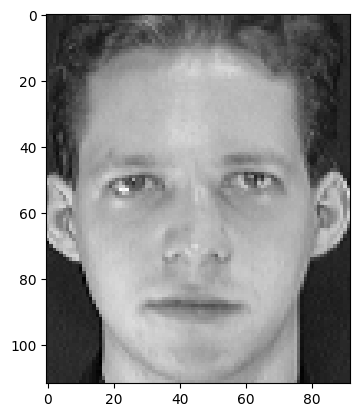

In [ ]:

row_vect = faceimages[[0],:,:] # Take out the 0th face image
col_vect = row_vect.reshape((10304,1))
print(col_vect)
plot_single_face(col_vect)

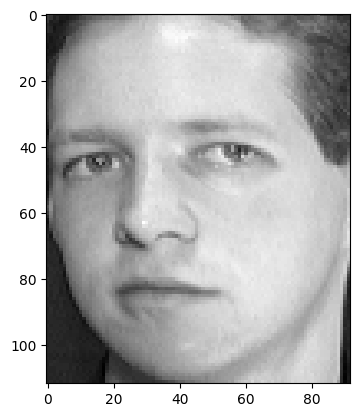

In [ ]:
# The shape of faceimages are (200, 112, 92)
# where faceimage[i, :, :] is the i-th face image.
# Please generate the matrix A whose size is (10304, 200) according to face image
# The column vectors of matrix A will stands for the face images.
# A is an empty matrix
A = np.empty((10304,200))
for i in range(200):
  A[:, i] = faceimages[i, :, :].reshape(-1)
  ##print(A.shape)
# print the shape of the matrix A you generated

##############################################################################
plot_single_face(A[:, 2])

## 3.2 PCA on the face-image matrix

In [ ]:
def plot_eigenface(B_hat):
  k = B_hat.shape[1]
  fig, axes = plt.subplots(5,4,sharex=True,sharey=True,figsize=(8,10))
  for i in range(k):
    img_tmp = np.reshape(B_hat[:, i], (112, 92))
    axes[i//4][i%4].imshow(img_tmp, cmap="gray")
  plt.show()

In [ ]:

n = A.shape[1]
A_bar = A - (1/n)* A @ np.ones((n,1)) @ np.transpose(np.ones((n,1)))

#############################################################################

In [ ]:
#svd bar

U, sigma, V_T = np.linalg.svd(A_bar)
print(U.shape, sigma.shape, V_T.shape)
#############################################################################

(10304, 10304) (200,) (200, 200)


In [ ]:


k = 20
B_hat = U[:, :k]
sigma = np.diag(sigma)
W_hat = sigma[:k, :k] @ V_T[:k,:]
print(B_hat.shape, W_hat.shape)

#############################################################################

(10304, 20) (20, 200)


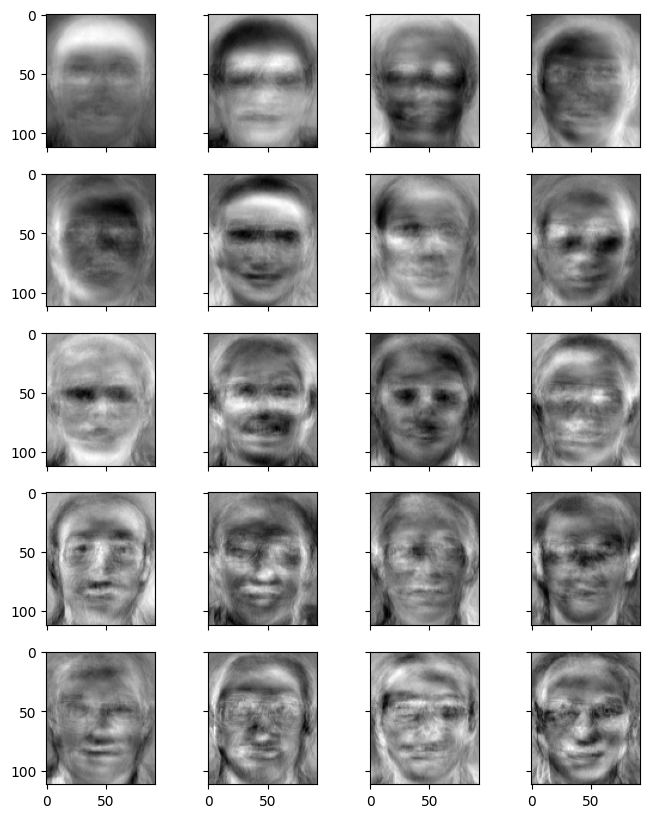

In [ ]:
#Plotting b_hat
plot_eigenface(B_hat)


 Face recognition based on eigenfaces

In [ ]:
def visualize_recognition(ind, test_img, faceimages):
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(np.squeeze(test_img, axis=0), cmap="gray") # Updated here
  plt.subplot(1, 2, 2)
  best_match = faceimages[ind, :, :]
  plt.imshow(best_match, cmap="gray")
  plt.show()

In [ ]:
# Here are 3 test images
test_img1 = faceimages_test[[15], :, :]
test_img2 = faceimages_test[[35], :, :]
test_img3 = faceimages_test[[75], :, :]

In [ ]:


z_1 = test_img1.reshape((10304,1))#vectorize test_img1
z_2 = test_img2.reshape((10304,1)) #vectorize test_img2
z_3 = test_img3.reshape((10304,1))#vectorize test_img3
#############################################################################

In [ ]:

z_1_bar = z_1 - 1/A.shape[1] * A @ np.ones((A.shape[1],1))  # center z_1
z_2_bar = z_2 - 1/A.shape[1] * A @ np.ones((A.shape[1],1))# center z_2
z_3_bar = z_3 - 1/A.shape[1] * A @ np.ones((A.shape[1],1))# center z_3
#############################################################################

In [ ]:

w_1 = B_hat.T @ z_1_bar  # caculate according to z_1_bar and B_hat
w_2 = B_hat.T @ z_2_bar  # caculate according to z_2_bar and B_hat
w_3 = B_hat.T @ z_3_bar # caculate according to z_3_bar and B_hat
#############################################################################

In [ ]:

# find its nearest neighbor in the training set: faceimages .
## for loop iterate over the columns of w_hat and find the min distance.
## store those distances (store in a matrix)

distance1 = np.zeros(W_hat.shape[1])
distance2 = np.zeros(W_hat.shape[1])
distance3 = np.zeros(W_hat.shape[1])
for i in range(W_hat.shape[1]):
  distance1[i] = np.linalg.norm(w_1 - W_hat[:, [i]])
  distance2[i] = np.linalg.norm(w_2 - W_hat[:, [i]])
  distance3[i] = np.linalg.norm(w_3 - W_hat[:, [i]])
ind_1 = np.argmin(distance1)
ind_2 = np.argmin(distance2)
ind_3 = np.argmin(distance3)
# find the index of the nearest neighbour according to w_3 and W_hat
#############################################################################

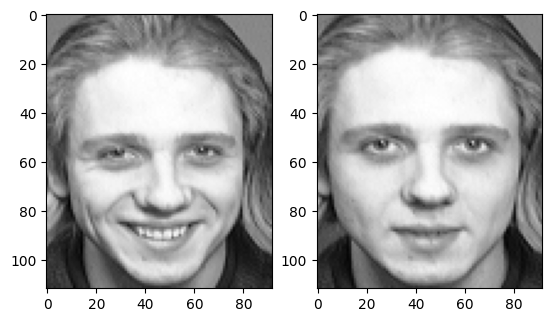

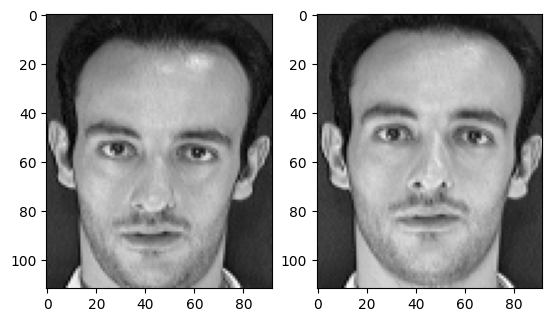

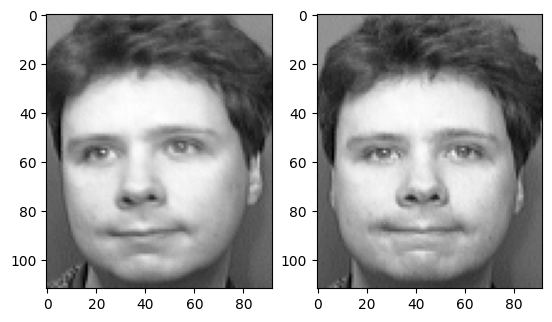

In [ ]:
visualize_recognition(ind_1, test_img1, faceimages)
visualize_recognition(ind_2, test_img2, faceimages)
visualize_recognition(ind_3, test_img3, faceimages)